# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

R_min Expected Value: 2.5267


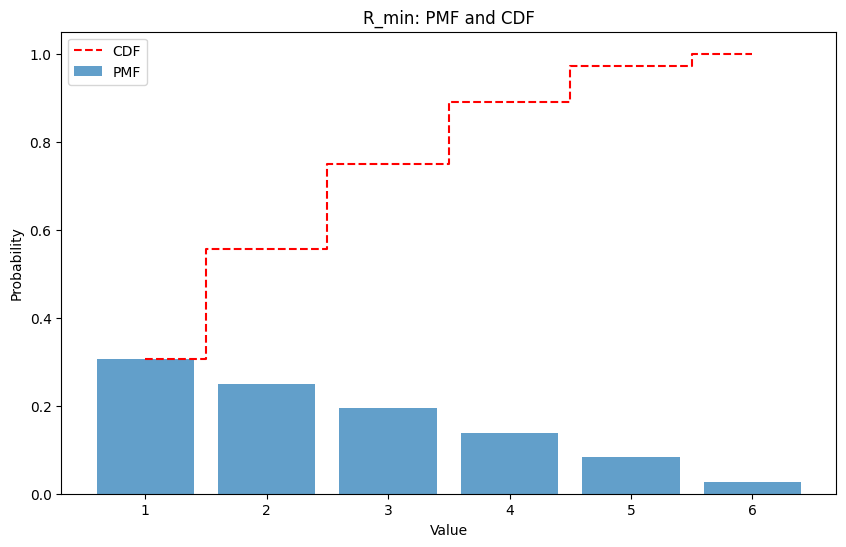

R_med Expected Value: 3.5024


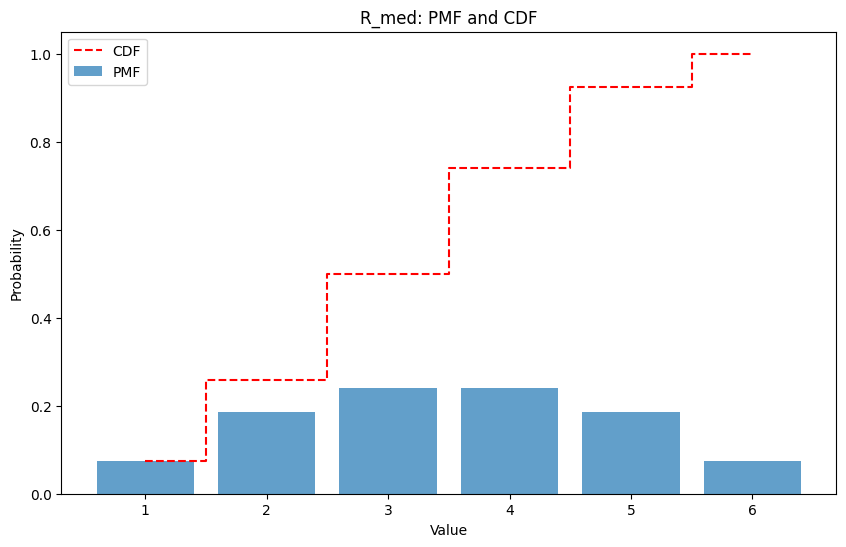

Special Rule Expected Value: 4.2033


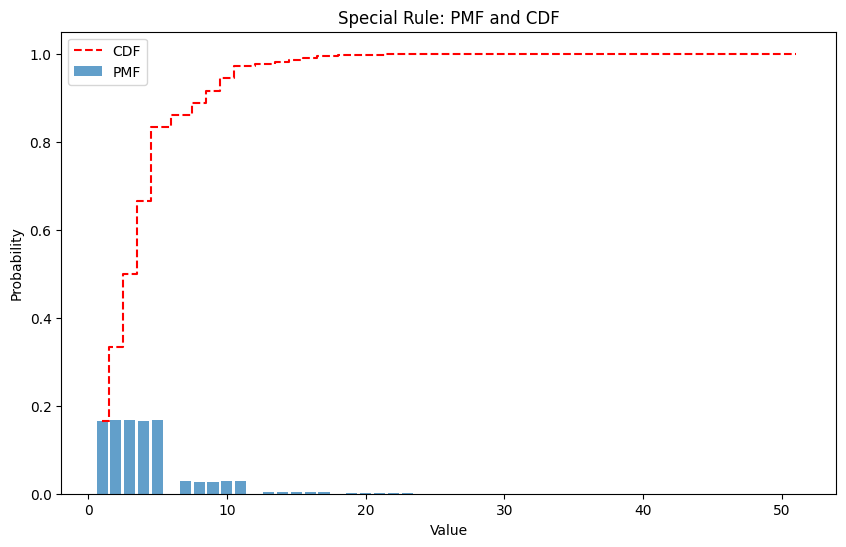

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Number of simulations for the Law of Large Numbers
n_simulations = 1_000_000

# Rolling Two Dice and Computing R_min
def simulate_r_min(n_simulations):
    dice_rolls = np.random.randint(1, 7, size=(n_simulations, 2))
    r_min = np.min(dice_rolls, axis=1)
    return r_min

# Rolling Three Dice and Computing R_med
def simulate_r_med(n_simulations):
    dice_rolls = np.random.randint(1, 7, size=(n_simulations, 3))
    r_med = np.sort(dice_rolls, axis=1)[:, 1]  # Middle value after sorting
    return r_med

# Special Rolling Rule Simulation
def simulate_special_rule(n_simulations):
    totals = []
    for _ in range(n_simulations):
        total = 0
        while True:
            roll = np.random.randint(1, 7)
            total += roll
            if roll < 6:
                break
        totals.append(total)
    return np.array(totals)

# Perform simulations
r_min_sim = simulate_r_min(n_simulations)
r_med_sim = simulate_r_med(n_simulations)
special_rule_totals = simulate_special_rule(n_simulations)

# Compute probability distributions and expected values
def compute_statistics(data, title):
    counts = Counter(data)
    total = sum(counts.values())
    probabilities = {k: v / total for k, v in counts.items()}
    expected_value = sum(k * p for k, p in probabilities.items())
    return probabilities, expected_value

# Compute stats for R_min and R_med
r_min_probs, r_min_expected = compute_statistics(r_min_sim, "R_min")
r_med_probs, r_med_expected = compute_statistics(r_med_sim, "R_med")
special_rule_probs, special_rule_expected = compute_statistics(special_rule_totals, "Special Rule")

# Plotting function for PMF and CDF
def plot_distribution(probabilities, title):
    x = sorted(probabilities.keys())
    y = [probabilities[k] for k in x]
    cdf = np.cumsum(y)
    
    plt.figure(figsize=(10, 6))
    # PMF
    plt.bar(x, y, alpha=0.7, label='PMF')
    plt.step(x, cdf, where='mid', label='CDF', color='red', linestyle='--')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.title(f"{title}: PMF and CDF")
    plt.legend()
    plt.show()

# Display results and plots
results = {
    "R_min": (r_min_probs, r_min_expected),
    "R_med": (r_med_probs, r_med_expected),
    "Special Rule": (special_rule_probs, special_rule_expected)
}

for name, (probs, expected) in results.items():
    print(f"{name} Expected Value: {expected:.4f}")
    plot_distribution(probs, name)


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

Cross-tabulation:
 breast_cancer_death        no       yes
treatment                              
control              0.988755  0.011245
mammogram            0.988870  0.011130


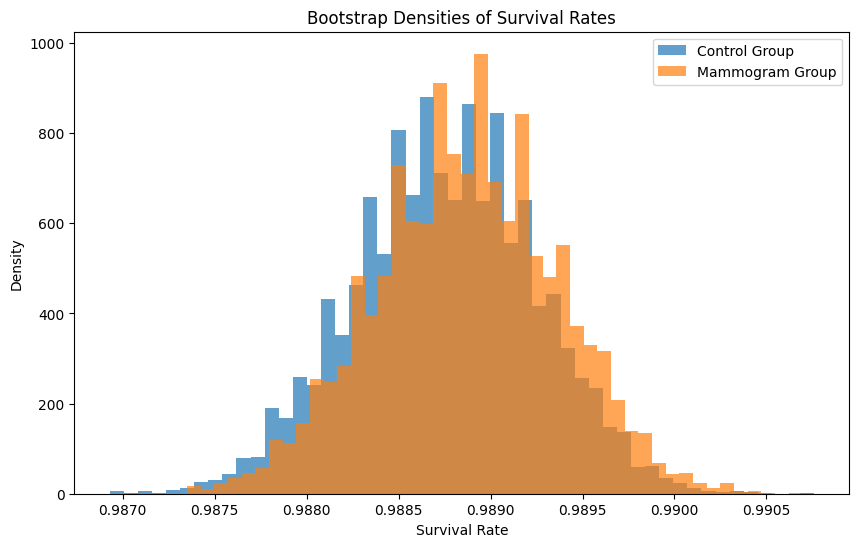

99% Confidence Interval for the difference: [-0.001666    0.00191818]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Load the dataset
data = pd.read_csv('mammogram.csv')

# 1. Cross-tabulation of `treatment` and `breast_cancer_death`
cross_tab = pd.crosstab(data['treatment'], data['breast_cancer_death'], normalize='index')
print("Cross-tabulation:\n", cross_tab)

# 2. Bootstrap the densities and distributions of survival rates
def bootstrap_samples(data, column, group, n_bootstrap=10000):
    """Bootstrap survival rates for a specific group."""
    survival_rates = []
    for _ in range(n_bootstrap):
        sample = data[data['treatment'] == group].sample(frac=1, replace=True)
        survival_rate = 1 - (sample[column] == 'yes').mean()
        survival_rates.append(survival_rate)
    return np.array(survival_rates)

# Bootstrap survival rates for both groups
control_survival = bootstrap_samples(data, 'breast_cancer_death', 'control')
mammogram_survival = bootstrap_samples(data, 'breast_cancer_death', 'mammogram')

# Plot densities
plt.figure(figsize=(10, 6))
plt.hist(control_survival, bins=50, alpha=0.7, label='Control Group', density=True)
plt.hist(mammogram_survival, bins=50, alpha=0.7, label='Mammogram Group', density=True)
plt.title('Bootstrap Densities of Survival Rates')
plt.xlabel('Survival Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

# 3. Construct a 99% confidence interval for the difference
diff_survival = mammogram_survival - control_survival
ci_99 = np.percentile(diff_survival, [0.5, 99.5])
print(f"99% Confidence Interval for the difference: {ci_99}")

# 4. Observational Limitations and Recommendations
# Provide space to critique the dataset, noting missing covariates like age, comorbidities, etc.


The data only includes treatment type (control or mammogram) and whether breast cancer death occurred (yes or no).
Factors like age, family history, genetic predisposition, comorbidities, and overall health status are critical in determining breast cancer survival outcomes. The treatment's effectiveness might depend on patient-specific factors (e.g., stage of cancer, type of cancer). The lack of this information makes generalizations from survival rates less reliable.


**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?